## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


/tmp/ipykernel_16961/2637987050.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

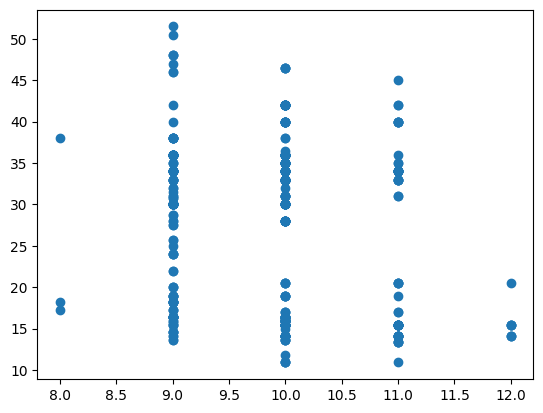

In [3]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

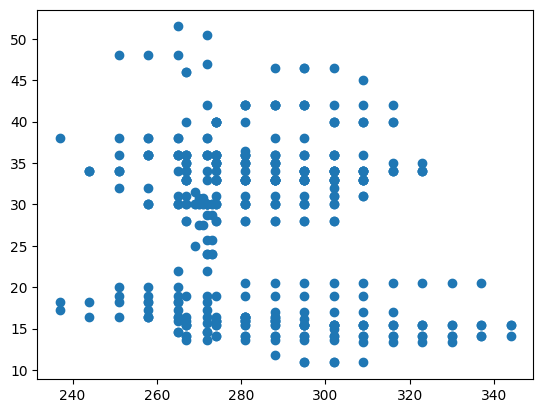

In [4]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)

In [6]:
# calculate correlation between two variables to see whether they can be described as a linear function
print(new_pumpkins.Month.corr(new_pumpkins.Price))
print(new_pumpkins.DayOfYear.corr(new_pumpkins.Price))

# correlation calculated between -1 to 1. if number is close to 1 it means there is a linear correlation with positive tg of the angle (line is growing from left to right)
# if it's -1 line is decreasing from left to right
# if it's around 0, there is no linear correlation

-0.14878293554077526
-0.1667332249274541


['PIE TYPE' 'MINIATURE' 'FAIRYTALE' 'MIXED HEIRLOOM VARIETIES']


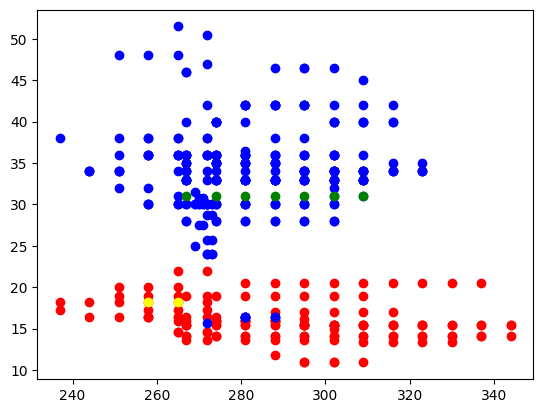

In [13]:
# color grapg by type of the pumpkin
color = ["red", "blue", "green", "yellow"]

types = new_pumpkins.Variety.unique()
print(types)
for row, t in enumerate(types):
    plt.scatter("DayOfYear", "Price", data=new_pumpkins[new_pumpkins.Variety == t], color=color[row % 4])

plt.show()

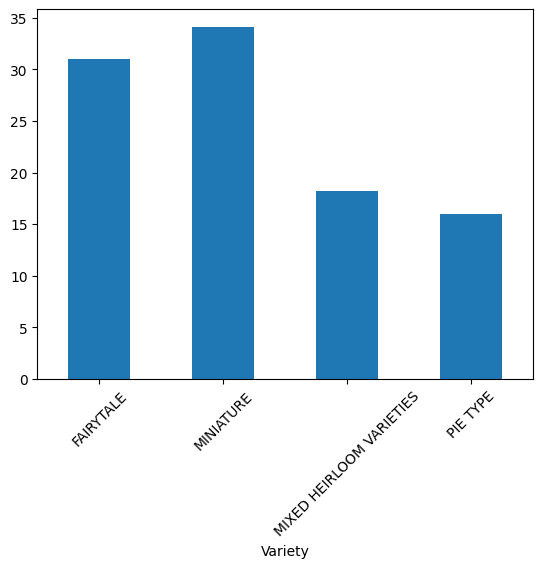

In [24]:
new_pumpkins.groupby("Variety").Price.mean().plot.bar(rot=45)
plt.show()

In [61]:
pie = new_pumpkins[new_pumpkins.Variety == "PIE TYPE"]

print(pie.Price.corr(pie.DayOfYear))
print(pie.Price.corr(pie.Month))

(415, 8)
(144, 8)
-0.2669192282197318
-0.2384141320612575


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [28]:
x = pie.DayOfYear
y = pie.Price

x.shape

(144,)

In [40]:
# make it as array of arrays because leniarRegression.fit takes 2D array of values
pie_x = x.to_numpy().reshape(-1, 1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(pie_x, y, train_size=0.2, random_state=0)

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [47]:
pred = model.predict(x_test)
pred

array([15.88643101, 16.26611659, 15.79783771, 15.2662779 , 15.70924441,
       16.26611659, 15.88643101, 16.00033669, 16.17752329, 15.62065111,
       15.62065111, 15.53205781, 15.88643101, 15.4434645 , 16.06361762,
       15.53205781, 15.4434645 , 15.79783771, 15.53205781, 16.00033669,
       16.35470989, 15.88643101, 15.1776846 , 15.88643101, 15.62065111,
       16.06361762, 15.79783771, 15.62065111, 15.4434645 , 16.08892999,
       15.53205781, 16.06361762, 16.4433032 , 15.97502431, 15.88643101,
       15.79783771, 15.3548712 , 16.00033669, 15.97502431, 15.88643101,
       15.79783771, 15.53205781, 15.70924441, 15.53205781, 16.00033669,
       16.08892999, 16.08892999, 15.79783771, 16.08892999, 15.0890913 ,
       15.70924441, 15.79783771, 16.17752329, 16.17752329, 16.08892999,
       15.1776846 , 15.79783771, 15.4434645 , 15.70924441, 16.17752329,
       15.53205781, 15.0890913 , 15.3548712 , 16.00033669, 15.62065111,
       16.06361762, 15.97502431, 15.70924441, 15.62065111, 15.88

In [46]:
# Calculate mean square error and take a square root from it to understand how good results are
mse = np.sqrt(mean_squared_error(y_test, pred))

print(f'Error {mse:3.3}, it is {mse/np.mean(pred) * 100:3.3}%')

Error 2.33, it is 14.8%


In [50]:
# Calculate coefficient of determination - how well changes in Y (dependent variable) explained by X (independent variable)
# 0 indicates that the model does not explain any of the variability in the dependent variable.
# 1 indicates that the model explains all the variability in the dependent variable.
score = model.score(x_test, y_test)
score


0.03976399091231042

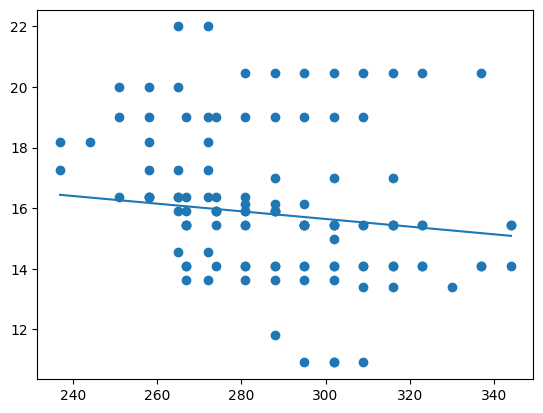

In [60]:
plt.scatter(x_test, y_test)
plt.plot(sorted(x_test), model.predict(sorted(x_test)))
plt.show()

In [52]:
# we can get from model slope and y-intercetion values for the line y = ax + b
print(f' y = {model.coef_[0]}*x + {model.intercept_}')

 y = -0.012656185957375443*x + 19.442819267277685


Error 2.3 (14.7%)
Coefficient: 0.06277988528062817


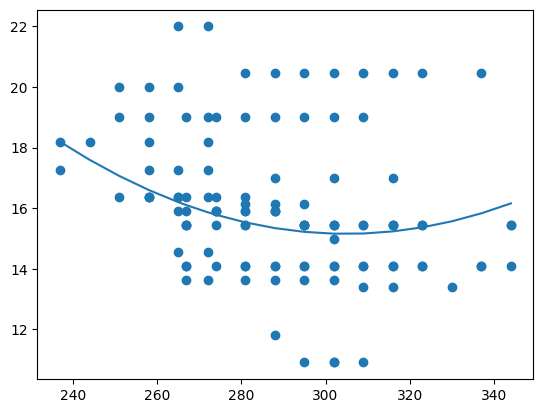

In [81]:
# let's try polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial regression pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

# train it
pipeline.fit(x_train, y_train)
p_pred = pipeline.predict(x_test)

mse = np.sqrt(mean_squared_error(y_test, p_pred))
print(f'Error {mse:3.3} ({mse/np.mean(p_pred)*100:3.3}%)')
print(f'Coefficient: {pipeline.score(x_test, y_test)}')

plt.scatter(x_test, y_test)
plt.plot(sorted(x_test), pipeline.predict(sorted(x_test)))
plt.show()

In [74]:
# convert variety into numerical values. We can't use 1, 2 instead of words becuase we set an order
# we should create table where each type has it's own column with value 0 or 1
varieties = pd.get_dummies(new_pumpkins.Variety)

# to improve prediction we can add more independent variables
varieties = varieties.join(new_pumpkins.Month).join(pd.get_dummies(new_pumpkins.City)).join(pd.get_dummies(new_pumpkins.Package))

In [75]:
# let's train a model for this values
vx_train, vx_test, vy_train, vy_test = train_test_split(varieties, new_pumpkins.Price, test_size=0.2)

vmodel = LinearRegression()
vmodel.fit(vx_train, vy_train)
vpred = vmodel.predict(vx_test)

print("Score: ", vmodel.score(vx_test, vy_test))

mse = np.sqrt(mean_squared_error(vy_test, vpred))
print(f'Error: {mse:3.3} ({mse/np.mean(vpred) * 100:3.3}%)')

Score:  0.9353411834204108
Error: 2.48 (9.02%)


In [77]:
# let's try polynomial regression
vpipline = make_pipeline(PolynomialFeatures(2), LinearRegression())
vpipline.fit(vx_train, vy_train)
vp_pred = vpipline.predict(vx_test)

print("Score: ", vpipline.score(vx_test, vy_test))

mse = np.sqrt(mean_squared_error(vy_test, vp_pred))
print(f'Error: {mse:3.3} ({mse/np.mean(vpred) * 100:3.3}%)')

Score:  0.9433869290405754
Error: 2.32 (8.44%)
